In [1]:
#importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations\n",
import seaborn as sns                  # For data visualization\n",
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime
%matplotlib inline
import warnings                        # To ignore any warnings\n",
warnings.filterwarnings("ignore")
import os
import math

In [2]:
data=pd.read_excel("C:/Users/Acer/Rapido Data Analyst Assignment.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44587 entries, 0 to 44586
Data columns (total 11 columns):
trip_id            44587 non-null object
customer_id        44587 non-null object
timestamp          44587 non-null int64
pick_lat           44587 non-null float64
pick_lng           44587 non-null float64
drop_lat           44587 non-null float64
drop_lng           44587 non-null float64
travel_distance    44587 non-null float64
travel_time        44587 non-null float64
trip_fare          44587 non-null int64
timestamp(sec)     44587 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 3.4+ MB


In [4]:
data.isnull().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
timestamp(sec)     0
dtype: int64

In [5]:
data.describe()  
#below we can see that travel distance is negative which is not possible 
#I have taken the absolute distance to make it postive

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,timestamp(sec)
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,4.458700e+04
mean,1.546632e+12,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833,1.546632e+09
std,1.518684e+08,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462,1.518684e+05
min,1.546368e+12,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000,1.546368e+09
25%,1.546503e+12,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000,1.546503e+09
50%,1.546611e+12,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000,1.546611e+09
75%,1.546772e+12,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000,1.546772e+09
max,1.546886e+12,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000,1.546886e+09


In [6]:
len(data[data.duplicated() == True])  #no duplicate rowns

0

In [7]:
data['absolute_travel_distance']= abs(data['travel_distance'])

In [8]:
data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44587 entries, 0 to 44586
Data columns (total 12 columns):
trip_id                     44587 non-null object
customer_id                 44587 non-null object
timestamp                   44587 non-null int64
pick_lat                    44587 non-null float64
pick_lng                    44587 non-null float64
drop_lat                    44587 non-null float64
drop_lng                    44587 non-null float64
travel_distance             44587 non-null float64
travel_time                 44587 non-null float64
trip_fare                   44587 non-null int64
timestamp(sec)              44587 non-null float64
absolute_travel_distance    44587 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12336450>,
      dtype=object)

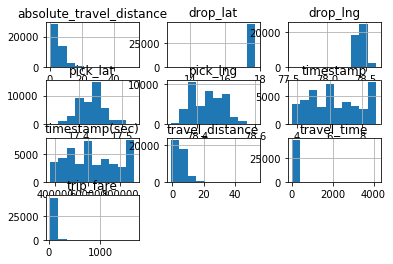

In [9]:
data.hist()

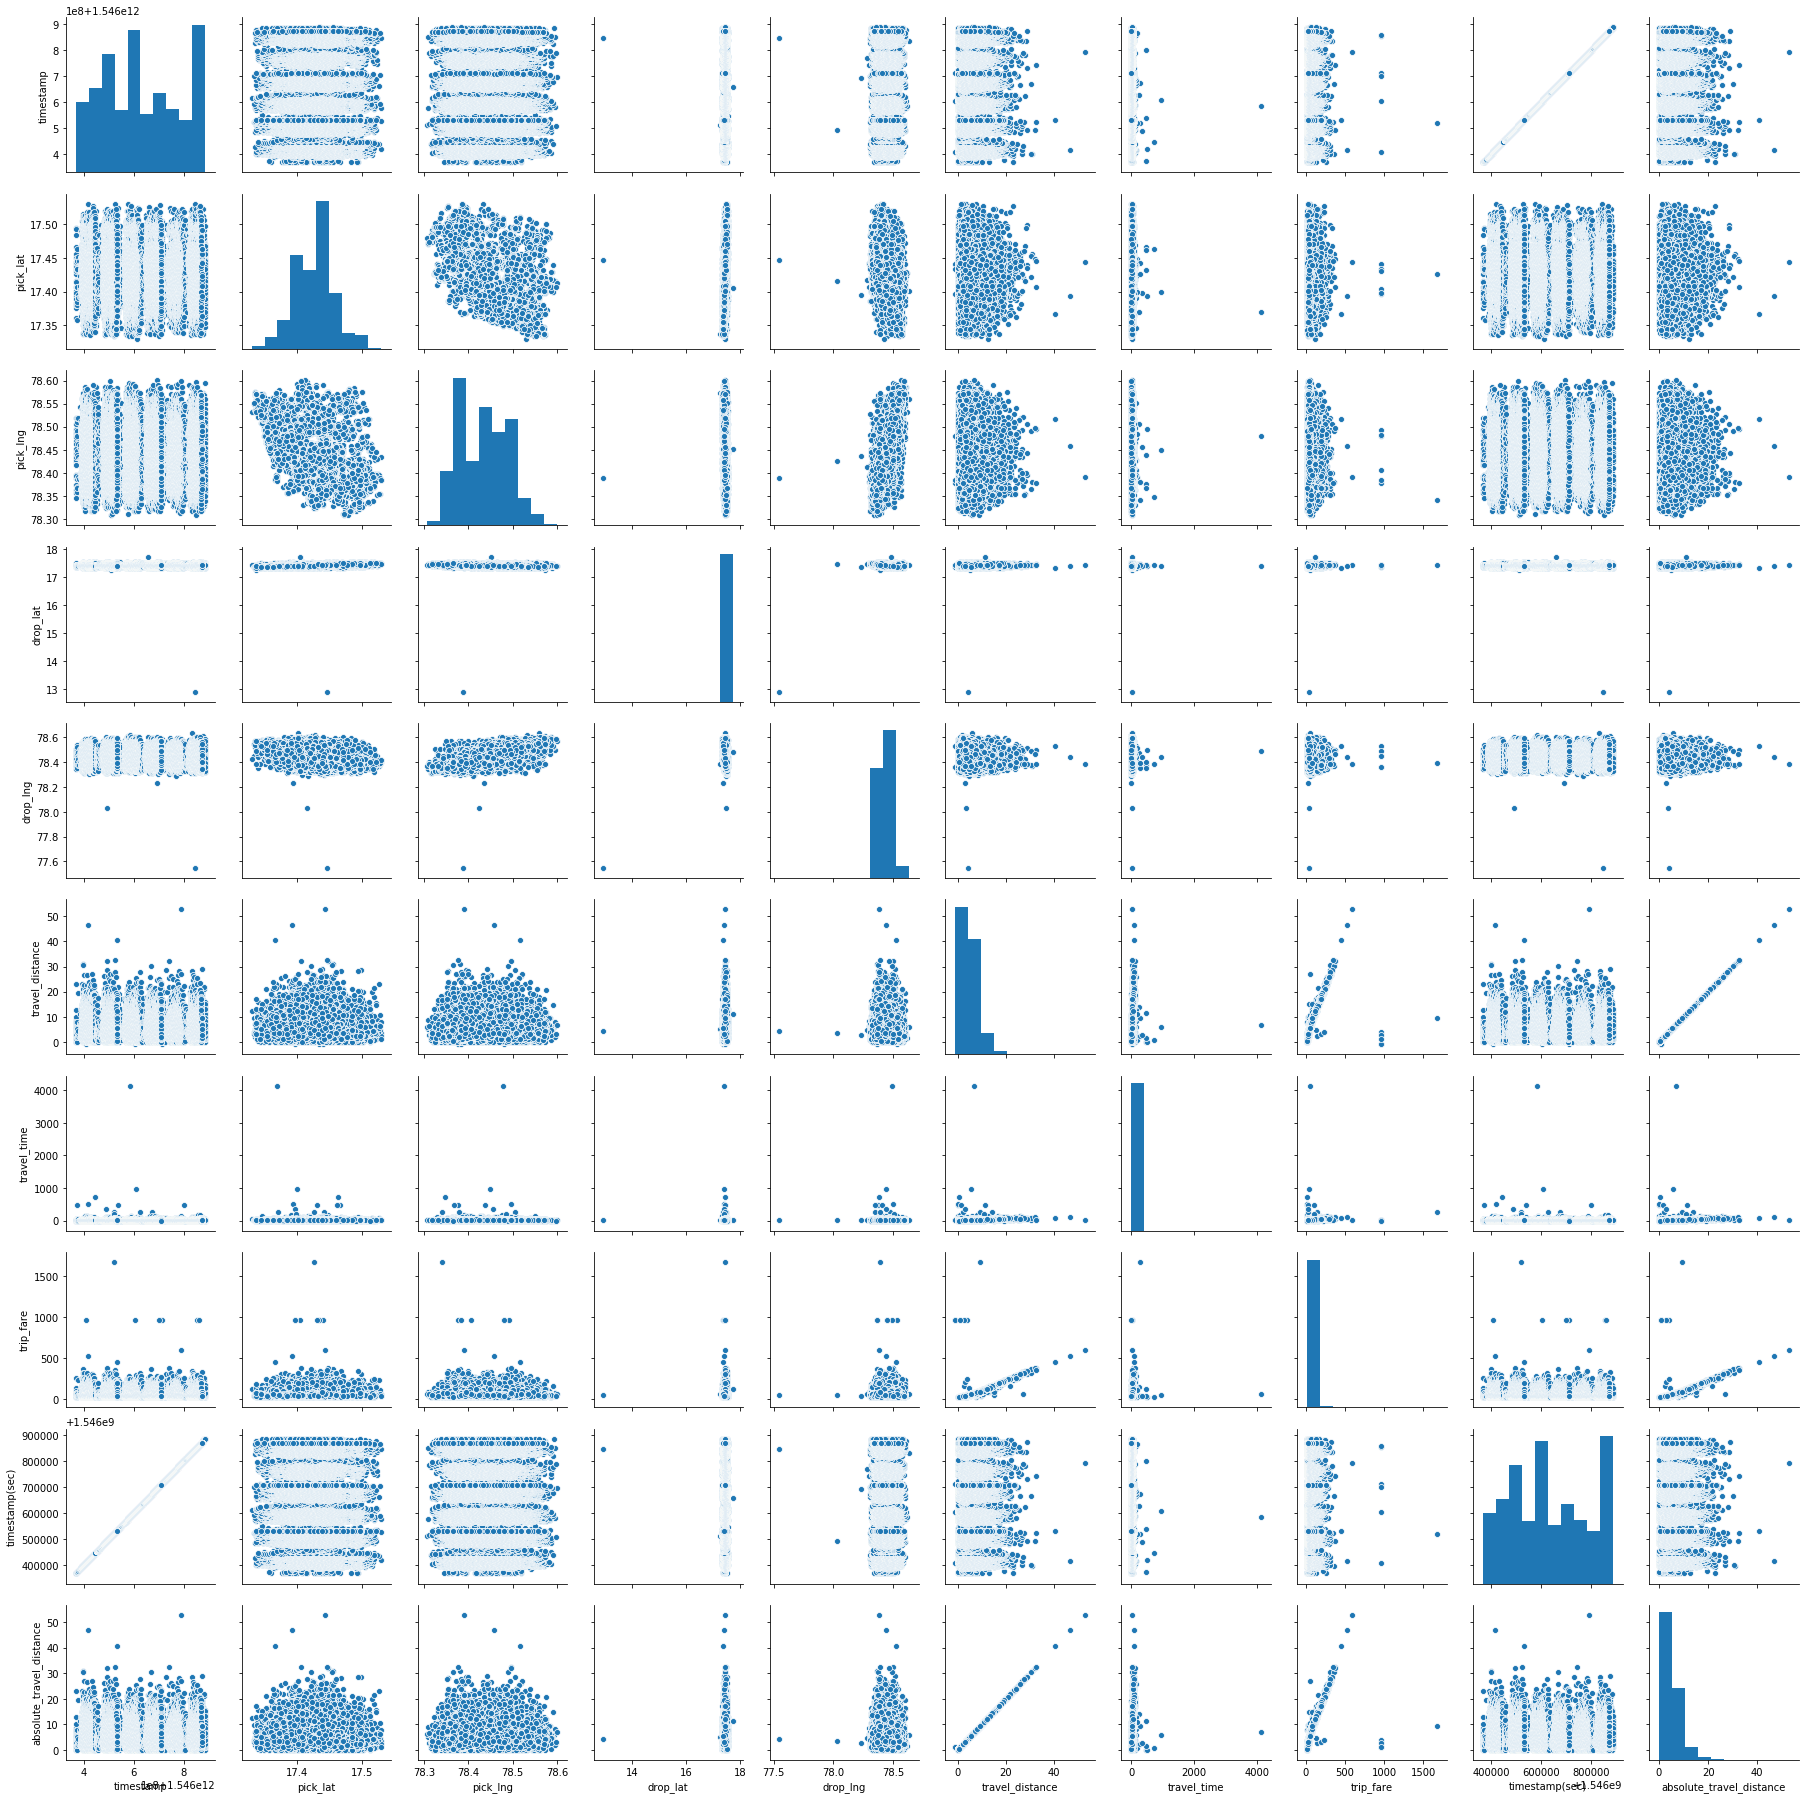

In [10]:
sns.pairplot(data)

In [11]:
plt.show
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'trip_fare Vs absolute_travel_distance')

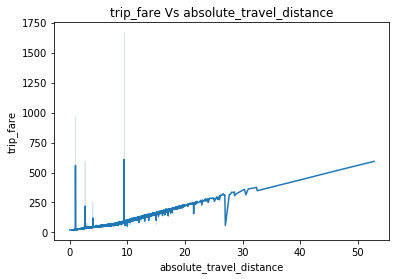

In [12]:
sns.lineplot(y='trip_fare', x='absolute_travel_distance', data=data)
plt.title("trip_fare Vs absolute_travel_distance")
#there is linear relation ship between trip fare and absolute distance

Text(0.5, 1.0, 'trip_fare Vs travel_time')

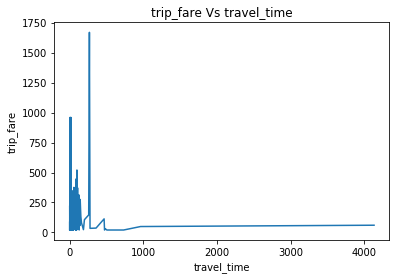

In [13]:
sns.lineplot(y='trip_fare', x='travel_time', data=data)
plt.title("trip_fare Vs travel_time")

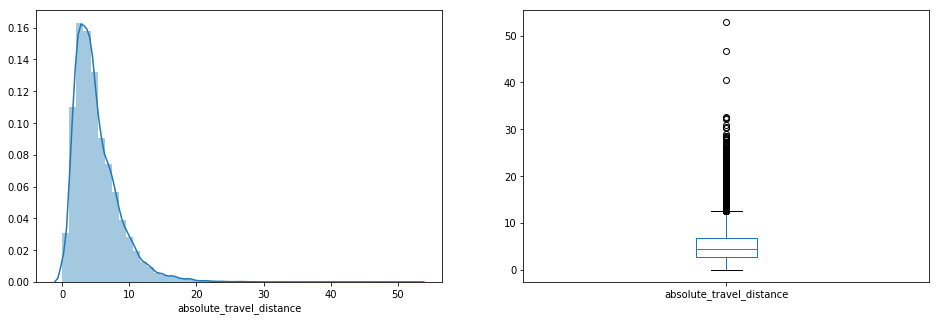

In [14]:
#Distribution and boxplot for absolute_travel_distance
plt.figure(1)
plt.subplot(121)
sns.distplot(data['absolute_travel_distance']);
plt.subplot(122)
data['absolute_travel_distance'].plot.box(figsize=(16,5))
plt.show()


In [15]:
data.dtypes

trip_id                      object
customer_id                  object
timestamp                     int64
pick_lat                    float64
pick_lng                    float64
drop_lat                    float64
drop_lng                    float64
travel_distance             float64
travel_time                 float64
trip_fare                     int64
timestamp(sec)              float64
absolute_travel_distance    float64
dtype: object

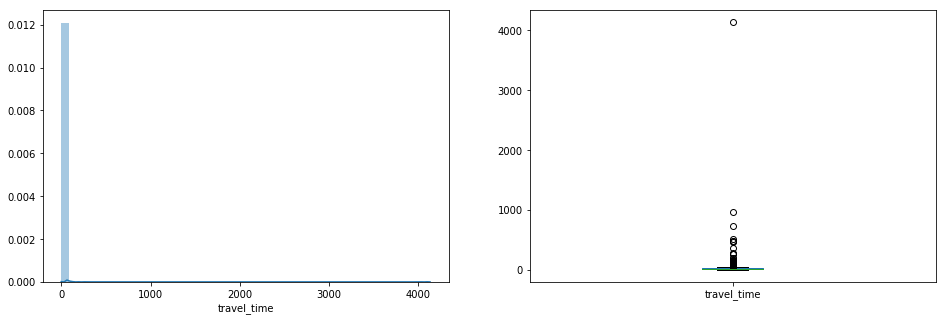

In [16]:
#Distribution and boxplot for travel_time(state of health)
plt.figure(1)
plt.subplot(121)
sns.distplot(data['travel_time']);
plt.subplot(122)
data['travel_time'].plot.box(figsize=(16,5))
plt.show()

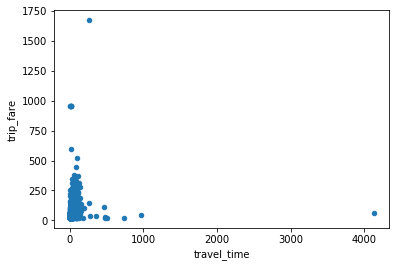

In [17]:
data.plot(x='travel_time', y='trip_fare', kind='scatter')
plt.show()

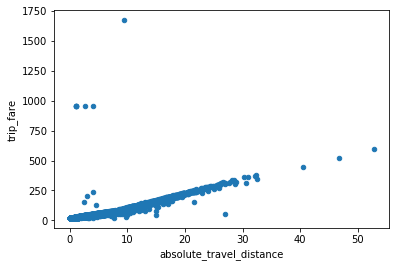

In [22]:
data.plot(x='absolute_travel_distance', y='trip_fare', kind='scatter')
plt.show()

In [23]:
data['timestamp(sec)'] = data['timestamp(sec)'].round(0)

In [24]:
data['timestamp(sec)'] = data['timestamp(sec)'].astype(int)

In [25]:
new = data["customer_id"].str.split("_", n = 1, expand = True)

In [26]:
data["First Name"]= new[0]
data["id"]= new[1]

In [27]:
data['id'] = data['id'].astype(int)

In [28]:
timestamp_list = data["timestamp(sec)"].tolist()

In [29]:
d=[]
import datetime
for i in timestamp_list:
    t=i
    c=datetime.datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')
    d.append(c)

In [30]:
data['date_time'] = pd.DataFrame(d)

In [31]:
data['date_time'] = pd.to_datetime(data['date_time'],format='%Y-%m-%d %H:%M:%S')


In [32]:
date_time_list = data['date_time'].tolist()

In [33]:
#if date_time_list[0] < date_time_list[1]:
#print("tRUE")

In [34]:
data['year']=data['date_time'].dt.year
data['month']=data['date_time'].dt.month
data['day']=data['date_time'].dt.day
data['hour']=data['date_time'].dt.hour
data['minute']=data['date_time'].dt.minute
data['second']=data['date_time'].dt.second

In [35]:
data['year'].value_counts()

2019    44587
Name: year, dtype: int64

In [36]:
data['day'].value_counts()
#we can infer that  1 JAN is first day of year the traffic is less due to holiday in offices 
#then traffic increases on 2,3,3,4 which are weekdays and then traffic decreases son weekends on 6 and 7

7    8914
4    8450
3    8023
2    7745
5    6846
6    4609
Name: day, dtype: int64

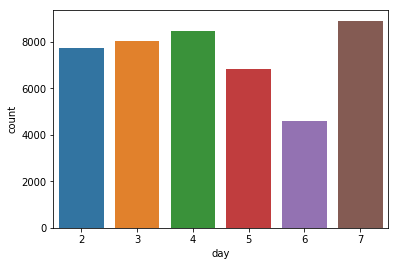

In [37]:
import seaborn as sns
sns.countplot(x='day',data=data)
#we can infer that  1 JAN is first day of year the traffic is less due to holiday in offices 
#then traffic increases on 2,3,3,4 which are weekdays and then traffic decreases son weekends on 6 and 7 below plot validates it

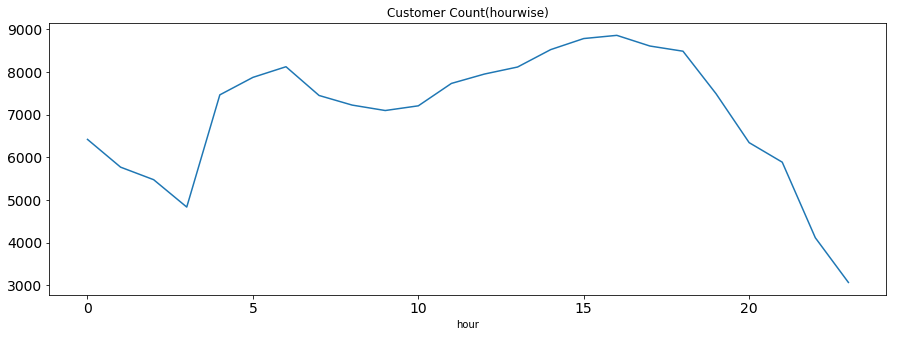

In [39]:
temp=data.groupby(['hour'])['id'].mean() 
temp.plot(figsize=(15,5), title= 'Customer Count(hourwise)', fontsize=14)
#we can see traffic is high at peek hours 8 am to 3pm and then again high 

In [40]:
l = data["id"].tolist()

In [41]:
_size = len(l)
repeated = []
t_i=[]
for i in range(_size):
    k = i + 1
    for j in range(k, _size):
        if l[i] == l[j] and l[i] not in repeated:
            if date_time_list[i] >= date_time_list[j]:
                repeated.append(l[i])
                t1=date_time_list[i]-date_time_list[j]
                t_i.append(t1)
                break
            else:
                repeated.append(l[i])
                t2=date_time_list[j]-date_time_list[i]
                t_i.append(t2)
                break

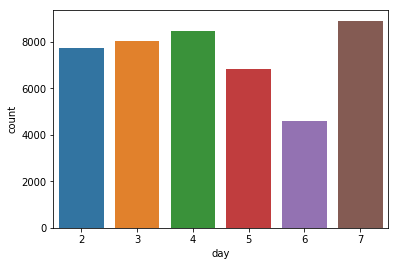

In [42]:
sns.countplot(x='day',data=data)

In [44]:
df = pd.DataFrame(list(zip(repeated, t_i)), columns =['Customer id', 'time between 1st and 2nd trip'])

In [45]:
df

,Customer id,time between 1st and 2nd trip
0,1,1 days 20:56:53
1,3,2 days 00:44:48
2,4,3 days 00:05:13
3,5,0 days 14:17:39
4,6,1 days 21:38:21
5,8,0 days 03:53:12
6,12,1 days 04:30:39
7,13,1 days 00:03:36
8,14,0 days 13:50:42
9,16,0 days 23:42:48


In [46]:
len(repeated)
t_i

[Timedelta('1 days 20:56:53'),
 Timedelta('2 days 00:44:48'),
 Timedelta('3 days 00:05:13'),
 Timedelta('0 days 14:17:39'),
 Timedelta('1 days 21:38:21'),
 Timedelta('0 days 03:53:12'),
 Timedelta('1 days 04:30:39'),
 Timedelta('1 days 00:03:36'),
 Timedelta('0 days 13:50:42'),
 Timedelta('0 days 23:42:48'),
 Timedelta('0 days 11:40:47'),
 Timedelta('0 days 00:48:53'),
 Timedelta('0 days 03:12:29'),
 Timedelta('1 days 22:04:46'),
 Timedelta('2 days 00:44:49'),
 Timedelta('0 days 02:54:21'),
 Timedelta('1 days 22:20:28'),
 Timedelta('1 days 22:03:08'),
 Timedelta('2 days 01:05:10'),
 Timedelta('2 days 00:05:48'),
 Timedelta('0 days 04:02:18'),
 Timedelta('1 days 23:48:09'),
 Timedelta('2 days 01:26:14'),
 Timedelta('2 days 00:29:18'),
 Timedelta('2 days 01:20:36'),
 Timedelta('0 days 00:14:41'),
 Timedelta('0 days 16:03:55'),
 Timedelta('2 days 00:10:00'),
 Timedelta('1 days 23:55:50'),
 Timedelta('1 days 23:59:54'),
 Timedelta('2 days 00:10:24'),
 Timedelta('1 days 22:23:10'),
 Timedel

In [47]:
test_data = [[3.5,15]]

In [48]:
test_data

[[3.5, 15]]

In [49]:
feature_cols = ['travel_time','absolute_travel_distance']


In [50]:
feature_cols

['travel_time', 'absolute_travel_distance']

In [51]:
test = pd.DataFrame(test_data, columns = ['travel_time','absolute_travel_distance']) 

In [52]:
test

,travel_time,absolute_travel_distance
0,3.5,15


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
# define the data/predictors as the pre-set feature names  
X = data[feature_cols]

In [55]:
X

,travel_time,absolute_travel_distance
0,12.609667,2.806
1,24.075200,11.991
2,8.708300,1.322
3,24.037550,11.822
4,16.120867,6.978
5,11.694133,2.746
6,3.956767,1.256
7,8.255017,3.404
8,4.651867,1.382
9,43.543183,13.596


In [56]:
# Put the target (housing value -- MEDV) in another DataFrame
y = data.trip_fare 

In [57]:
# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Get the slope and intercept of the line best fit.
print(mlr.intercept_)

8.732789181421339


In [59]:
print(mlr.coef_)

[0.02476452 8.78365422]


In [60]:
travel_time = 15
travel_distance = 3.5
print ('Trip fare', mlr.predict([[travel_time,travel_distance]]))

Trip fare [39.84704672]


In [ ]:
#def lat_lng_to_h3(row):
    return h3.geo_to_h3(row['Latitude'], row['Longitude'], h3_level)